<h1>Total de personas empleadas y desempleadas por año</h1>

In [332]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

#, encoding='latin1'
data = pd.read_csv('poblaciones2.csv', skiprows=2, low_memory=False, encoding='latin1')
data2 = data.rename(columns = {'Unnamed: 0': 'Encuesta', 'Unnamed: 1':'Periodo', 'Unnamed: 2':'CPEA'}, inplace = False)
data2.head(14)

,Encuesta,Periodo,CPEA,Total,Urbana,Rural,Hombre,Mujer
0,ENEMDU,12/01/2007,Población Total,13682302,9066209,4616093,6768646,6913656
1,ENEMDU,12/01/2007,Población menor de 15 años,4372812,2723124,1649688,2226618,2146194
2,ENEMDU,12/01/2007,Población en Edad de Trabajar (PET),9309490,6343085,2966404,4542028,4767462
3,ENEMDU,12/01/2007,Población Económicamente Activa,6336029,4227702,2108328,3777232,2558798
4,ENEMDU,12/01/2007,Empleo,6019332,3971040,2048292,3632314,2387018
5,ENEMDU,12/01/2007,Empleo Adecuado/Pleno,2737158,2236440,500719,1907451,829707
6,ENEMDU,12/01/2007,Subempleo,1155872,687714,468158,679118,476753
7,ENEMDU,12/01/2007,Subempleo por insuficiencia de tiempo de trabajo,860315,519627,340688,474355,385960
8,ENEMDU,12/01/2007,Subempleo por insuficiencia de ingresos,295556,168087,127470,204763,90793
9,ENEMDU,12/01/2007,Empleo no remunerado,557146,215994,341152,176122,381025


In [274]:
data2

,Encuesta,Periodo,CPEA,Total,Urbana,Rural,Hombre,Mujer
0,ENEMDU,12/01/2007,Población Total,13682302,9066209,4616093,6768646,6913656
1,ENEMDU,12/01/2007,Población menor de 15 años,4372812,2723124,1649688,2226618,2146194
2,ENEMDU,12/01/2007,Población en Edad de Trabajar (PET),9309490,6343085,2966404,4542028,4767462
3,ENEMDU,12/01/2007,Población Económicamente Activa,6336029,4227702,2108328,3777232,2558798
4,ENEMDU,12/01/2007,Empleo,6019332,3971040,2048292,3632314,2387018
...,...,...,...,...,...,...,...,...
895,ENEMDU*,10/01/2021,Desempleo Abierto,336101,291606,44495,150276,185824
896,ENEMDU*,10/01/2021,Desempleo Oculto,48103,27600,20503,25975,22128
897,ENEMDU*,10/01/2021,Desempleo Cesante,298846,257856,40991,140223,158623
898,ENEMDU*,10/01/2021,Desempleo Nuevo,85358,61351,24007,36028,49330


In [2]:
%%capture
empleados = data2.loc[:, 'CPEA'] == 'Empleo'
dataEmpleados = data2.loc[empleados]
dataEmpleados.loc[:, ['Periodo','Total']]


In [3]:
%%capture
desempleados = data2.loc[:, 'CPEA'] == 'Desempleo'
dataDesempleados = data2.loc[desempleados]
dataDesempleados.loc[:, ['Periodo','Total']]

In [4]:
anios = []
for i in range(2007,2022):
    anios.append(i)

np.shape(anios)
names = anios

<h2>Datos anuales del empleo a nivel nacional</h2>

In [5]:
df2 = dataEmpleados.loc[:, ['Periodo','Total']]
df2['Periodo'] = pd.to_datetime(df2['Periodo'])
dfNew2 = df2.groupby(pd.Grouper(key='Periodo', freq='1Y')).mean()
dfNew2['Total'] = dfNew2.Total.round()
dfNew2['Total'] = dfNew2.Total.astype(int)
dfNew2.to_csv('Desempleados.csv', sep=',')
data1 = pd.read_csv('Desempleados.csv', skiprows=0, low_memory=False)
#data1

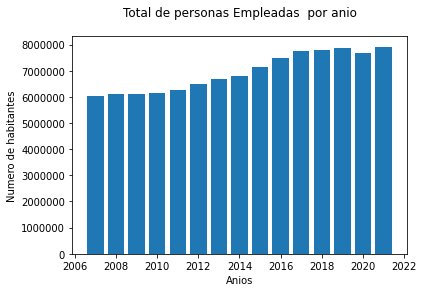

In [6]:
fig, ax = plt.subplots()
ax.bar(names,data1['Total'])
ax.ticklabel_format(style='plain') 
plt.xlabel("Anios")
plt.ylabel("Numero de habitantes")
plt.title("Total de personas Empleadas  por anio", pad = 20)
plt.show()



<h2>Datos anaules del desempleo a nivel nacional</h2>

In [7]:
df = dataDesempleados.loc[:, ['Periodo','Total']]
df['Periodo'] = pd.to_datetime(df['Periodo'])
dfNew = df.groupby(pd.Grouper(key='Periodo', freq='1Y')).mean()
dfNew['Total'] = dfNew.Total.round()
dfNew['Total'] = dfNew.Total.astype(int)
dfNew.to_csv('Desempleados.csv', sep=',')
data2 = pd.read_csv('Desempleados.csv', skiprows=0, low_memory=False)
#data2

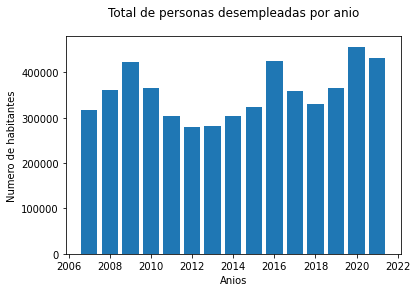

In [8]:
fig, ax = plt.subplots()
ax.bar(names,data2['Total'])
ax.ticklabel_format(style='plain') 
plt.xlabel("Anios")
plt.ylabel("Numero de habitantes")
plt.title("Total de personas desempleadas por anio", pad = 20)
plt.show()

<h2>Gráfica comparativa de personas empleadas y esempleadas por año a nivel nacional</h2>

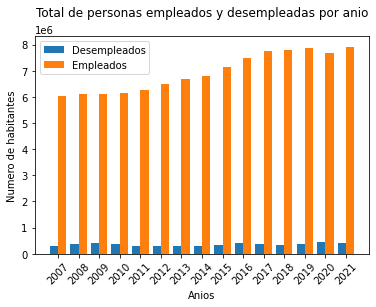

In [11]:

ax = plt.subplots()
X_axis = np.arange(len(names))
plt.bar(X_axis - 0.2,data2.Total,0.4, label = 'Desempleados')
plt.bar(X_axis + 0.2,data1.Total,0.4, label = 'Empleados')
plt.xticks(X_axis,names, rotation = 45)
plt.xlabel("Anios")
plt.ylabel("Numero de habitantes")
plt.title("Total de personas empleados y desempleadas por anio", pad = 20)
plt.legend()
plt.show()

<h1>Sectorización del empleo</h1>

In [203]:
sectorizacionData = pd.read_csv('sectorizacion.csv', skiprows=1, low_memory=False, encoding='latin1')
sectorizacionData = sectorizacionData.transpose()
sectorizacionData 

,0,1,2,3,4,5,6,7,8,9,10,11
Característica,Nacional,NaN,NaN,NaN,Urbano,NaN,NaN,NaN,Rural,NaN,NaN,NaN
Unnamed: 1,Sector Formal,Sector Informal,Empleo Doméstico,No Clasificados por Sector,Sector Formal,Sector Informal,Empleo Doméstico,No Clasificados por Sector,Sector Formal,Sector Informal,Empleo Doméstico,No Clasificados por Sector
06/01/2007,-,-,-,-,54.7,36.9,4,4.4,-,-,-,-
09/01/2007,-,-,-,-,55.7,36.1,4.1,4.1,-,-,-,-
12/01/2007,41.0,45.1,3.3,10.6,54.1,34.0,4.3,7.7,15.5,66.7,1.5,16.3
...,...,...,...,...,...,...,...,...,...,...,...,...
06/01/2021,42.3,49.9,2.0,5.8,52.5,38.8,2.3,6.3,23.1,70.8,1.3,4.8
07/01/2021,40.6,51.2,2.1,6.2,50.7,40.5,2.6,6.2,21.2,71.6,1.1,6.1
08/01/2021,41.2,50.6,2.4,5.8,52.1,39.6,3.1,5.3,21.0,71.2,1.0,6.7
09/01/2021,43.9,49.2,2.4,4.5,54.3,37.9,3.0,4.8,24.9,69.9,1.3,3.9


In [416]:
def repairData(data,nombre):
    name = nombre + '.csv'
    data.to_csv(name,sep=',')
    df = pd.read_csv(name, skiprows=2, low_memory=False)
    df = df.drop(df[df['Sector Formal']=='-'].index)
    df= df.rename(columns = {'Unnamed: 1':'Fecha'})
    return df


def agrupar(data):
    data['Sector Formal'] = data['Sector Formal'].astype(float)
    data['Sector Informal'] = data['Sector Informal'].astype(float)
    data['Empleo Doméstico'] = data['Empleo Doméstico'].astype(float)
    data['No Clasificados por Sector'] = data['No Clasificados por Sector'].astype(float)
    data['Fecha'] = pd.to_datetime(data['Fecha'])
    data2 = data.groupby(pd.Grouper(key='Fecha', freq='1Y')).mean()
    return data2

def reparar(data,nombre):
    name = nombre + '.csv'
    data.to_csv(name, sep=',')
    df = pd.read_csv(name, skiprows=0, low_memory=False)
    return df
    

def generarPie(data,titulo):
    etiquetas = ['Sector Formal', 'Sector Informal', 'Empleo Doméstico','No Clasificados por Sector']
    colores = ['#abcdef', '#aabbcc', '#babbac', '#babbca']
    titulo2 = 'Grafica a nivel'+ titulo
    plt.pie([data['Sector Formal'].sum(), data['Sector Informal'].sum(),
             data['Empleo Doméstico'].sum(), data['No Clasificados por Sector'].sum()], labels=etiquetas, colors=colores, autopct='%.2f %%')
    plt.title(titulo2)
    plt.show()
    

def getData(empleados,etiqueta):
    empleados = data2.loc[:, 'CPEA'] == etiqueta
    dataEmpleados = data2.loc[empleados]
    data = dataEmpleados.loc[:, ['Periodo','Total']]
    data['Periodo'] = pd.to_datetime(data['Periodo'])
    data = data.groupby(pd.Grouper(key='Periodo', freq='1Y')).mean()
    data['Total'] = data.Total.round()
    data['Total'] = data.Total.astype(int)
    return data


def graficarHistograma(data,titulo):
    fig, ax = plt.subplots()
    ax.bar(names,data['Total'])
    ax.ticklabel_format(style='plain') 
    plt.xlabel("Anios")
    plt.ylabel("Numero de habitantes")
    titulo3 = ' a nivel nacional'
    titulo2 = 'Total de personas en' + titulo  + titulo3
    plt.title(titulo2, pad = 20)
    plt.show()

    
    
    
    

In [253]:
dataNacional.columns.values

array(['Fecha', 'Sector Formal', 'Sector Informal', 'Empleo Doméstico',
       'No Clasificados por Sector'], dtype=object)

<h2>Nacional</h2>

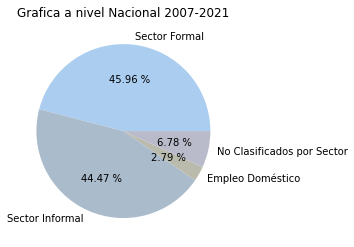

In [267]:
dataNacional = sectorizacionData.iloc[:,0:4]
dataNacional = repairData(dataNacional,'dataNacional')
dataN = reparar(agrupar(dataNacional),'dataNacional')
generarPie(dataN,' Nacional 2007-2021')

<h2>Urbano</h2>

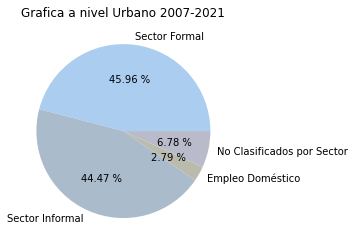

In [266]:
dataUrbano = sectorizacionData.iloc[:,4:8]
dataUrbano = repairData(dataUrbano,'dataUrbano')
dataU = reparar(agrupar(dataUrbano),'dataUrbano')
generarPie(dataN,' Urbano 2007-2021')

<h2>Rural</h2>

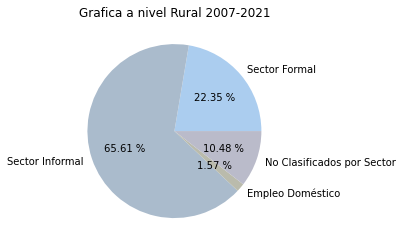

In [265]:
dataRural = sectorizacionData.iloc[:,8:15]
dataRural = repairData(dataRural,'dataRural')
dataR = reparar(agrupar(dataRural),'dataRural')
generarPie(dataR,' Rural 2007-2021')

<h1>Subempleo, empleo pleno y empleo no pleno por año</h1>

<h2>Subempleo por año</h2>

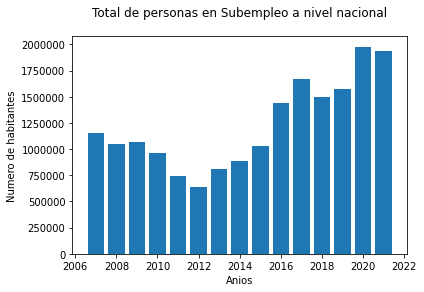

In [417]:
subempleo = getData(data2,'Subempleo')
graficarHistograma(subempleo,' Subempleo')



<h2>Empleo pleno por año</h2>

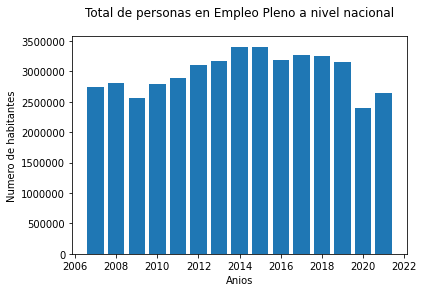

In [418]:
empleoPleno = getData(data2,'Empleo Adecuado/Pleno')
graficarHistograma(empleoPleno,' Empleo Pleno')

<h2>Empleo no pleno por año</h2>

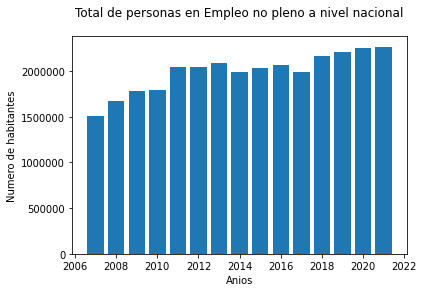

In [419]:
empleoNoPleno = getData(data2,'Otro Empleo no pleno')
graficarHistograma(empleoNoPleno,' Empleo no pleno')